In [118]:
import pandas as pd
import torch
print(torch.__version__)
import importlib

#%load_ext line_profiler

2.1.1+cpu


In [119]:
from model.eGauss_plus import eGAUSSp

Client 1: {1: 11, 2: 12}
Client 2: {0: 26, 2: 11}
Client 3: {0: 9, 1: 25, 2: 11}
Test Set: {0: 15, 1: 14, 2: 16}

Combined Number of Samples per Class:
Class 0: 50 samples
Class 1: 50 samples
Class 2: 50 samples

Total Number of Samples Across All Datasets: 150


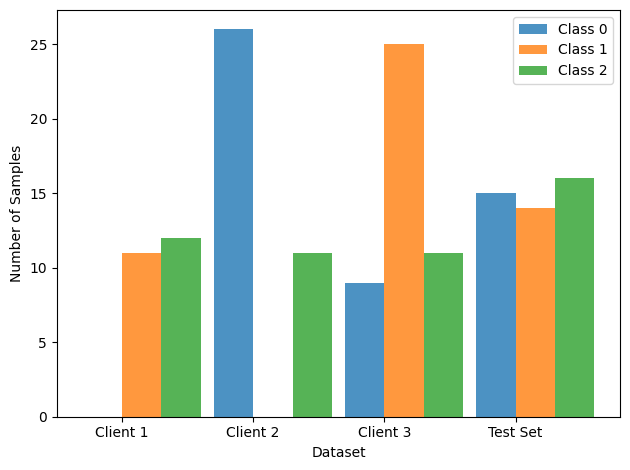

In [120]:
from utils.utils_dataset import prepare_non_iid_dataset, plot_dataset_split, display_dataset_split
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

num_clients = 3
client_data, X_test, y_test, X_all, y_all = prepare_non_iid_dataset(X, y, num_clients)

display_dataset_split(client_data, y_test)
plot_dataset_split(client_data, y_test)

In [121]:

# Model parameters
local_model_params = {
    "feature_dim": 4,
    "num_classes": 3,
    "N_max": 1,
    "num_sigma": 2,
    "kappa_join": 1.1,
    "S_0": 1e-10,
    "c_max": 4,
    "device": torch.device("cpu")
}
federated_model_params = {
    "feature_dim": 4,
    "num_classes": 3,
    "N_max": 1,
    "num_sigma": 2,
    "kappa_join": 1.1,
    "S_0": 1e-10,
    "c_max": 4,
    "device": torch.device("cpu")
}

# Initialize a model for each client
local_models = [eGAUSSp(**local_model_params) for _ in range(num_clients)]
federated_model = eGAUSSp(**federated_model_params)



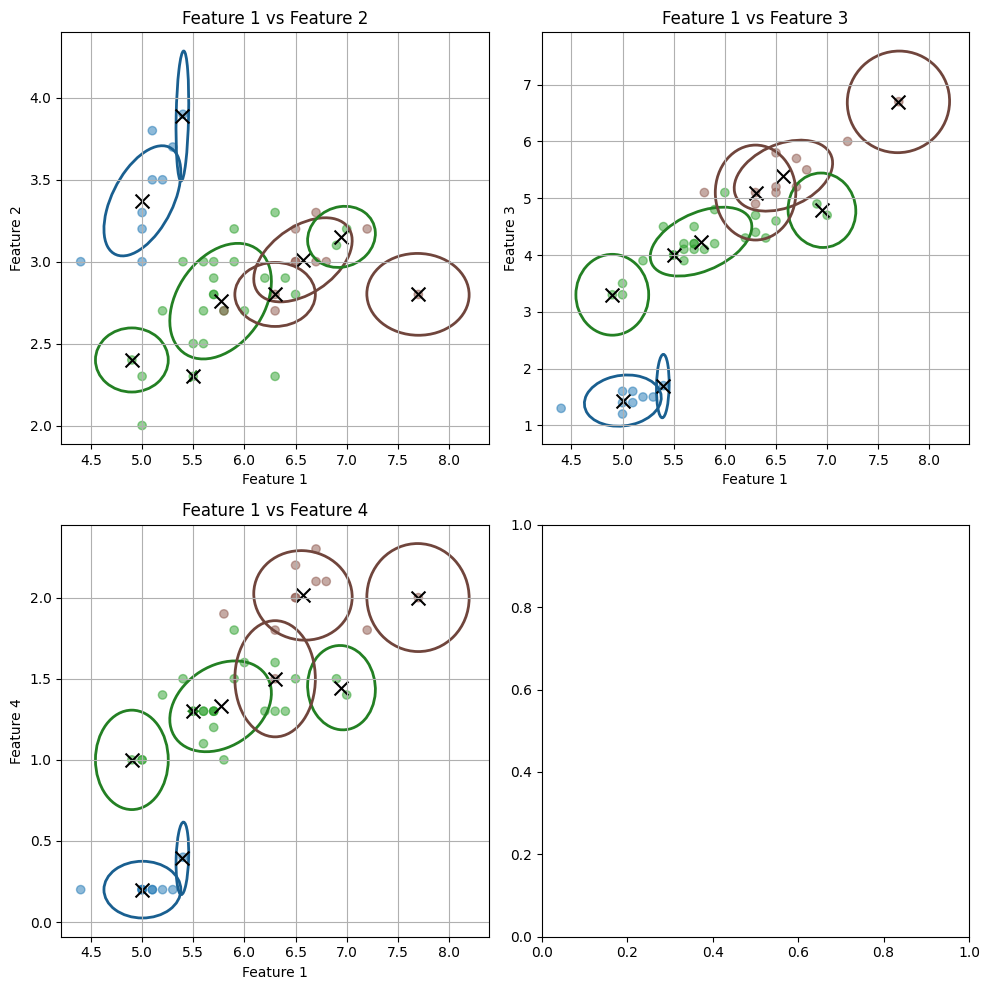

In [122]:
import utils.utils_train
importlib.reload(utils.utils_train)
from utils.utils_train import train_supervised, train_unsupervised
from utils.utils_plots import plot_first_feature

# Assuming models and client_data are already defined
for client_idx, client_model in enumerate(local_models):
    print(f"Training model for client {client_idx + 1}")
    train_supervised(client_model, client_data[client_idx]) 
    plot_first_feature(client_data[client_idx][0],  client_data[client_idx][1], model=client_model, num_sigma=2, N_max=0)   

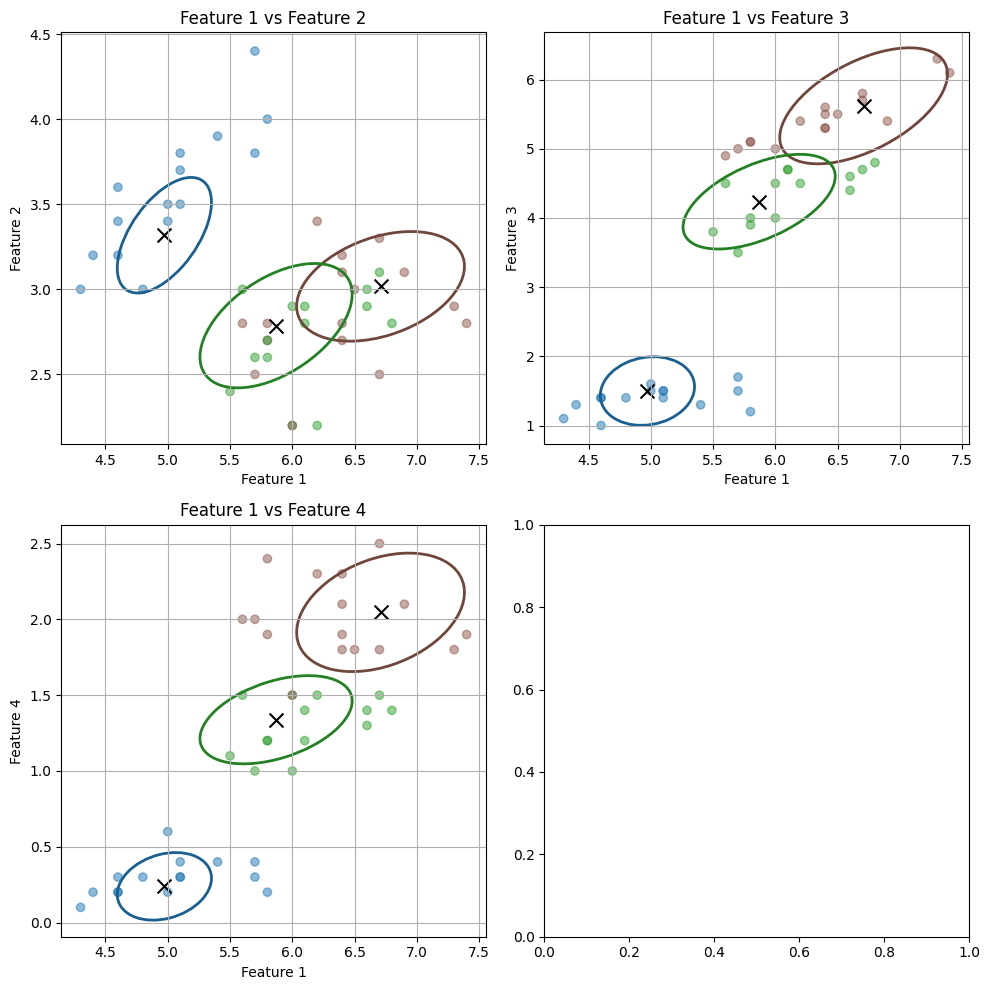


Testing federated model
Evolving has been disabled.
Test Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Evolving has been disabled.
Test Accuracy: 0.9333333333333333, Precision: 0.9372294372294372, Recall: 0.9333333333333333, F1 Score: 0.9330924662116954

Testing model for client 1
Evolving has been disabled.
Test Accuracy: 0.6222222222222222, Precision: 0.8061302681992337, Recall: 0.6222222222222222, F1 Score: 0.5214470284237727
Evolving has been disabled.
Test Accuracy: 0.6066666666666667, Precision: 0.797493630792536, Recall: 0.6066666666666667, F1 Score: 0.507198526604227

Testing model for client 2
Evolving has been disabled.
Test Accuracy: 0.6888888888888889, Precision: 0.7930724246513721, Recall: 0.6888888888888889, F1 Score: 0.5650171179582943
Evolving has been disabled.
Test Accuracy: 0.6666666666666666, Precision: 0.7938232946521765, Recall: 0.6666666666666666, F1 Score: 0.5401084537775186

Testing model for client 3
Evolving has been disabled.
Test Accuracy: 0.91

In [123]:
  
import utils.utils_train
importlib.reload(utils.utils_train)
from utils.utils_train import test_model

  
for client_idx, client_model in enumerate(local_models):
        print(f"Merging client {client_idx + 1}")
        federated_model.federal_agent.merge_model(client_model)

federated_model.federal_agent.federated_merging()

plot_first_feature(X_test, y_test, model=federated_model, num_sigma=2, N_max=2)   
print(f"\nTesting federated model")   

test_model(federated_model, X_test, y_test)
test_model(client_model, X_all, y_all)
        
# Testing each client's model on the global test dataset
for client_idx, client_model in enumerate(local_models):
    print(f"\nTesting model for client {client_idx + 1}")
    test_model(client_model, X_test, y_test)
    test_model(client_model, X_all, y_all)
